# 분석 내용 (조교님이 주문하신 것)

1. 번아웃말고 새로운 분석주제를 통한 분석

2. 단일변수만 상관관계 등 하면서 확인해보지말고 머신러닝 기법 사용을 통한 분석

# 1. 번아웃 이외의 주제 고안해보기
- 과학고데이터를 바탕으로 과학고에 적용했을 때 유용할만한 주제를 고민해보았음

1) 성적 추이 예측 (Up, Down) --> 성적 추이에 영향을 주는 factor가 무엇인지 확인
--> pedagogy (교수법)에 사용될 수도 있을 것


2) 학생들의 진로 추천 --> 진로결정에 영향을 주는 factor 확인 // 세부적인 진로결정 (취업쪽, 창업쪽, 교육쪽 등)을 Categorical value로 만들어서 이를 예측하는 모델로서 구현해볼 수도 있을 것 <br> [예상 단점: 정확도 높은 모델을 만들기 위해서는 데이터 양이 많아야 할 것]


--> 진로를 결정하지 못한 학생들에게 선생님들이 진로를 추천해주는데 있어서 도움이 될 것


===========================================================

<이번에 분석해본 주제: 성적 추이 예측>

===========================================================

# 2. 머신러닝 기법 적용 방안 생각해보기

- 머신러닝 기법을 적용하기에는 target이 너무 imbalance하다는 단점... (번아웃의 경우)

--> 1번 분석에 치중해보기로 함

In [223]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'data_한양대.csv',
 '대전과고 분석 (2020.09.24 과제).ipynb',
 '대전과고 분석 (2020.09.28 과제).ipynb',
 '대전과고 분석 (2020.10.05 과제).ipynb',
 '대전과고 분석 (2020.10.10 과제)_교수님 미팅전.ipynb',
 '대전과고 분석 (2020.11.07) _ 제출용.ipynb',
 '대전과고 분석 (2020.12.11 미팅용).ipynb',
 '대전과고.csv',
 '업데이트된 데이터셋_대전과고 분석 (2020.11.07 과제).ipynb',
 '의대예측.csv',
 '의대예측2.csv']

In [5]:
DSHS = pd.read_csv('data_한양대.csv')
DSHS

,ID,번아웃,단계1_1A,단계1_1B,단계1_2A,단계1_2B,단계1_3A,단계1_3B,단계1_4A,단계1_4B,...,학기3_문학의이해와감상,학기3_객체지향프로그래밍,학기1평점,학기2평점,학기3평점,전체평점,교내상,교외상,교내상명,교외상명
0,1,0,5,5,5,4,5,5,4,4,...,NaN,NaN,3.49,3.60,3.57,3.5541,NaN,1.0,NaN,교외상_제21회 LG생활과학아이디어 공모전(고등부문)_아이디어상
1,2,0,5,5,5,5,5,5,5,5,...,NaN,NaN,3.59,3.42,3.47,3.4921,4.0,NaN,"교내상_여명독서토론대회(공동수상, 2인)_동상(3위), 교내상_나의 꿈(I Visi...",NaN
2,3,0,5,5,5,5,5,5,5,5,...,4.0,NaN,3.81,3.59,3.80,3.7298,2.0,1.0,"교내상_창의적 수학 문항 개발 대회(CMPCC)(공동수상, 3인)_동상(3위), 교...","교외상_2019 과학영재 학술대회(R&E 분야, 공동수상, 3인)_우수상"
3,4,0,5,5,5,5,5,5,5,5,...,4.0,NaN,3.91,3.93,4.21,4.0130,2.0,3.0,"교내상_무한상상 창의력 페스티벌(공동수상, 4인)_금상(1위), 교내상_교과우수상(...","교외상_제33회 한국수학올림피아드 고등부 1차시험(가우스부)_장려상, 교외상_도시대..."
4,5,0,5,5,5,5,5,5,5,5,...,3.3,NaN,3.59,3.48,3.38,3.4843,NaN,1.0,NaN,교외상_제14회 한국청소년과학올림피아드대회(KYSO2019)(물리과학 고등부)_장려상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,0,5,5,5,5,5,5,5,5,...,NaN,4.0,3.54,4.12,3.70,3.7942,6.0,4.0,"교내상_메카트로닉스경진대회(공동수상, 2인)_은상(1위), 교내상_교과우수상(수학Ⅰ...","교외상_청소년과학탐구대회(공동수상, 2인)_금상(메카트로닉스부문), 교외상_제37회..."
84,85,0,5,5,5,5,5,5,5,5,...,4.0,3.0,3.50,3.64,3.42,3.5234,3.0,NaN,"교내상_수학문제해결과정 평가대회(MP-SPEC)(공동수상, 3인)_동상(3위), 교...",NaN
85,86,0,4,5,3,4,2,2,2,2,...,3.7,3.7,3.30,3.31,3.44,3.3483,NaN,3.0,NaN,"교외상_2019 충남대 모형 F1 자동차 대회(공동수상, 3인)_The Best M..."
86,87,0,5,5,5,5,5,5,5,5,...,4.3,3.3,3.96,4.09,4.05,4.0343,2.0,1.0,"교내상_국외탐구 에세이 대회_은상(2위), 교내상_발명 아이디어 경진대회_동상(3위)",교외상_도시대항 국제 수학 토너먼트(2019 봄 TofT O-레벨 고등부)_동상


# Glimpse Data

In [11]:
for idx, val in enumerate(list(DSHS.columns)):
    print(idx, '\t', val)

0 	 ID
1 	 번아웃
2 	 단계1_1A
3 	 단계1_1B
4 	 단계1_2A
5 	 단계1_2B
6 	 단계1_3A
7 	 단계1_3B
8 	 단계1_4A
9 	 단계1_4B
10 	 수직개인
11 	 수평개인
12 	 수직공동체
13 	 수평공동체
14 	 자기능력
15 	 사회헌신
16 	 인간관계
17 	 경제우선
18 	 사회인식
19 	 안정추구
20 	 창업효능감
21 	 과학학습선호
22 	 과학진로선호
23 	 과학진로가치
24 	 과학진로정보필요
25 	 과학내용흥미
26 	 교과가치노력
27 	 과학교과유능감
28 	 과학교사선호도
29 	 성실성
30 	 자존감
31 	 개방성
32 	 타인이해
33 	 공동체의식
34 	 불안
35 	 통제미흡
36 	 심층적전략
37 	 능력자아
38 	 기대
39 	 능력목표지향
40 	 능력발휘
41 	 자율성
42 	 보수
43 	 안정성
44 	 사회적인정
45 	 사회봉사
46 	 자기계발
47 	 창의성
48 	 신체운동능력
49 	 손재능
50 	 공간지각력
51 	 음악능력
52 	 창의력
53 	 언어능력
54 	 수리논리력
55 	 자기성찰능력
56 	 대인관계능력
57 	 자연친화력
58 	 예술시각능력
59 	 자기관리능력
60 	 R유형_실재형
61 	 I유형.탐구형
62 	 A유형_예술형
63 	 S유형_사회형
64 	 E유형_기업형
65 	 C유형_관습형
66 	 기계기술
67 	 사회안전
68 	 농림환경
69 	 운동
70 	 이학공학연구
71 	 인문사회연구
72 	 음악
73 	 미술
74 	 문학
75 	 방송영상
76 	 교육
77 	 사회복지서비스
78 	 관리경영
79 	 사회언론
80 	 영업판매
81 	 사무행정
82 	 세무회계
83 	 과학분야_전문직
84 	 과학분야_숙련직
85 	 공학분야_전문직
86 	 공학분야_숙련직
87 	 소비자경제분야
88 	 농업_천연자원분야
89 	 경영분야_전문직
90 	 경영분야_숙련직
91 	 사무직
92 	

# 성적관련 columns

- 학기1: 1학년 1학기, 학기2: 1학년 2학기, 학기3: 2학년 1학기
- 2학년 1학기에는 과목 선택 --> one hot encoding

--> 지금은 특정과목의 성적 추이를 보는 것이 아니기 때문에, 학기1평점, 학기2평점, 학기3 평점의 추이만 고려

In [16]:
DSHS.iloc[:, 227:264]

,학기1_국어1,학기1_영어1,학기1_한국사1,학기1_수학1,학기1_수학2,학기1_정보과학1,학기1_기초물리학1,학기1_기초지구과학1,학기1_기초화학1,학기1_기초생명과학1,...,학기3_기초물리학3,학기3_기초화학3,학기3_기초생명과학3,학기3_정보과학프로젝트,학기3_영어독해와작문,학기3_문학의이해와감상,학기3_객체지향프로그래밍,학기1평점,학기2평점,학기3평점
0,4.0,4.0,4.0,3.0,3.3,3.0,3.0,3.7,3.3,3.3,...,3.0,3.3,3.3,3.3,NaN,NaN,NaN,3.49,3.60,3.57
1,3.7,4.0,4.0,3.7,3.3,2.7,3.3,4.0,3.7,3.3,...,3.0,3.0,3.3,3.0,4.3,NaN,NaN,3.59,3.42,3.47
2,3.7,4.0,4.3,4.0,4.3,3.7,3.7,4.3,3.0,3.3,...,3.3,3.3,3.7,4.3,NaN,4.0,NaN,3.81,3.59,3.80
3,4.0,3.7,4.0,4.3,3.7,4.0,4.0,4.0,4.3,3.3,...,4.0,4.3,4.3,4.3,4.0,4.0,NaN,3.91,3.93,4.21
4,3.7,3.7,3.7,3.3,3.7,3.3,4.0,3.3,3.3,3.7,...,3.0,3.3,3.0,3.0,NaN,3.3,NaN,3.59,3.48,3.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,3.0,3.0,3.0,4.3,3.7,4.3,4.3,3.3,4.0,3.0,...,3.7,4.3,2.7,NaN,3.3,NaN,4.0,3.54,4.12,3.70
84,3.7,4.0,4.0,3.3,3.7,3.3,2.7,4.0,3.0,3.3,...,3.0,3.0,3.0,NaN,4.3,4.0,3.0,3.50,3.64,3.42
85,3.7,3.7,4.0,3.0,3.3,3.3,3.3,3.0,2.7,3.0,...,2.7,3.0,3.0,NaN,NaN,3.7,3.7,3.30,3.31,3.44
86,4.0,4.0,4.0,4.0,4.3,4.0,4.0,4.3,3.3,3.7,...,4.3,4.3,4.0,NaN,4.0,4.3,3.3,3.96,4.09,4.05


In [24]:
# 성적추이를 나타내는 column 만들기

In [44]:
grade = DSHS.iloc[:, 261:264]

gap1 = grade.iloc[:, 1] - grade.iloc[:, 0]    # 평점이 높을수록 좋다 --> 나중학기에서 이전학기의 성적을 뺐을 때 양의값일수록 좋다
gap2 = grade.iloc[:, 2] - grade.iloc[:, 1]

gap1[gap1 > 0] = 1    # 1은 Up을 의미
gap1[gap1 < 0] = 0    # 0은 Down을 의미

gap2[gap2 > 0] = 1
gap2[gap2 < 0] = 0

grade_gap = pd.concat([gap1, gap2], axis=1)
grade_gap = grade_gap.rename(columns={0: 'gap1', 1: 'gap2'})
grade_gap

,gap1,gap2
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,1.0
4,0.0,0.0
...,...,...
83,1.0,0.0
84,1.0,0.0
85,1.0,1.0
86,1.0,0.0


C:\Users\yangs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gap1', ylabel='count'>

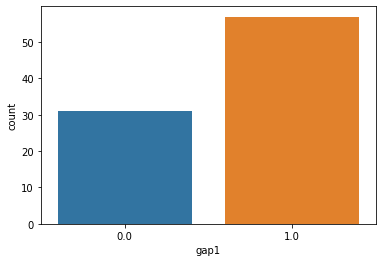

In [48]:
sns.countplot(grade_gap['gap1'])

C:\Users\yangs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gap2', ylabel='count'>

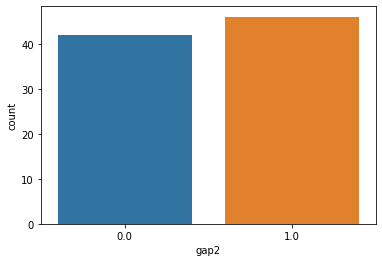

In [49]:
sns.countplot(grade_gap['gap2'])

# 11월 7일 분석내용 참고, 전처리 진행

## 전처리 함수 생성

In [201]:
def preprocess(df):
    
    grade = df.iloc[:, 261:264]

    gap1 = grade.iloc[:, 1] - grade.iloc[:, 0]    # 평점이 높을수록 좋다 --> 나중학기에서 이전학기의 성적을 뺐을 때 양의값일수록 좋다
    gap2 = grade.iloc[:, 2] - grade.iloc[:, 1]

    gap1[gap1 > 0] = 1    # 1은 Up을 의미
    gap1[gap1 < 0] = 0    # 0은 Down을 의미

    gap2[gap2 > 0] = 1
    gap2[gap2 < 0] = 0

    grade_gap = pd.concat([gap1, gap2], axis=1)
    grade_gap = grade_gap.rename(columns={0: 'gap1', 1: 'gap2'})
    df = pd.concat([df, grade_gap], axis=1)
    
    
    # 수학수업 설문조사와 관련된 내용은 성적을 받은 이후인 코로나 19 상황에서 시행된 것이므로 제거
    
    df = df.drop(['text', '성별', '온라인경험', '사교육', '발견활용능력','토의학습', '주도적발견', '주도적활동', '협력환경', 
                  '개념학습', '온라인', '오프라인', '쌍방향', '블렌디드', '만족도', '성취감', '자신감', '흥미', '수학적탐구', 
                  '분석적사고', '의사소통_역량', '논리적사고', '지식활용', '창의적사고', '무응답수', '교내상명', '교외상명',
                 '학기1_국어1', '학기1_영어1', '학기1_한국사1', '학기1_수학1', '학기1_수학2', '학기1_정보과학1', 
                  '학기1_기초물리학1', '학기1_기초지구과학1', '학기1_기초화학1', '학기1_기초생명과학1', '학기2_국어2', 
                  '학기2_영어2', '학기2_한국사2', '학기2_정보과학2', '학기2_기초물리학2', '학기2_기초지구과학2', '학기2_기초화학2', 
                  '학기2_기초미적분학1', '학기2_기초미적분학2', '학기2_기초생명과학2', '학기2_지식재산일반', '학기3_사회1', 
                  '학기3_일본어1', '학기3_독서와사고', '학기3_영어구문이해', '학기3_확률과통계', '학기3_기하와벡터', 
                  '학기3_기초물리학3', '학기3_기초화학3', '학기3_기초생명과학3', '학기3_정보과학프로젝트', '학기3_영어독해와작문', 
                  '학기3_문학의이해와감상', '학기3_객체지향프로그래밍', '학기1평점', '학기2평점', '학기3평점', '전체평점',
                 '학습강점요인', '우선개발요인'], axis=1)
    
    df = df[df['번아웃'] == 0].reset_index(drop=True)
    df = df.drop('번아웃', axis=1)
        
    df['입학성적'] = df.loc[:, ['단계1_1A', '단계1_1B', '단계1_2A', '단계1_2B', '단계1_3A', '단계1_3B', '단계1_4A', '단계1_4B']].mean(axis=1)
    df = df.drop(['단계1_1A', '단계1_1B', '단계1_2A', '단계1_2B', '단계1_3A', '단계1_3B', '단계1_4A', '단계1_4B'], axis=1)
        
    df['수행평가성적'] = df.loc[:, ['비의주제', '비의실험', '비의협업', '비의비판적사고', '비의문제발견및해결']].mean(axis=1)
    df = df.drop(['비의주제', '비의실험', '비의협업', '비의비판적사고', '비의문제발견및해결'], axis=1)
        
    subjects = ['국어', '영어', '수학', '물리', '화학', '생물']

    for subject in subjects:
        df['{}학습태도'.format(subject)] = (df['{}질문'.format(subject)] + df['{}발표'.format(subject)] + df['{}논리적'.format(subject)] + df['{}콘텐츠'.format(subject)] + df['{}학생활동'.format(subject)]) / 5
        df = df.drop(df[['{}질문'.format(subject), '{}발표'.format(subject), '{}논리적'.format(subject), '{}콘텐츠'.format(subject), '{}학생활동'.format(subject)]], axis=1)
    
    df.loc[:, ['순위국어', '순위수학', '순위물리', '순위화학', '순위생물']] = df.loc[:, ['순위국어', '순위수학', '순위물리', '순위화학', '순위생물']].replace({4:np.nan, 5: np.nan, 6: np.nan})

    df['노력대비탐구성과'] = df['평균비행시간'] / (df['머신러닝시간'] + df['연습시간'] + df['노력시간'] + df['협의주제'] + df['협의협력']
                     + df['협의우연'] + df['협의내용'] + df['협의온라인'] + df['협의머신러닝'] + df['협의벤치마킹'] +
                     df['협의역량향상'] + df['협의만족도'])

    df = df.drop(['협의그룹', '협의주제', '협의협력', '협의우연', '협의내용', '협의온라인', '협의머신러닝', '협의벤치마킹', 
                  '협의역량향상', '협의만족도', '평균비행시간', '머신러닝시간', '연습시간', '노력시간'], axis=1)
    
    df['교내상'] = df['교내상'].fillna(0)
    df['교외상'] = df['교외상'].fillna(0)
    
    dummies = pd.get_dummies(DSHS['학습유형'], prefix='학습유형_')
    df = df.drop('학습유형', axis=1)
    df = pd.concat([df, dummies], axis=1)
    
    
    tmp = df.drop(['순위국어', '순위영어', '순위수학', '순위물리', '순위화학', '순위생물'], axis=1)
    clean_index = tmp.dropna(axis=0).index
    
    df_clean = df.iloc[clean_index, :]
    df_clean = df_clean.reset_index(drop=True)
    
    df_clean = df_clean.fillna(0)
       
    
    return df_clean

# Before preprocessing

In [202]:
DSHS = pd.read_csv('data_한양대.csv')
display(DSHS)
print()
display(DSHS.info())
print()
display(DSHS.describe())
print()
print(DSHS.shape)

,ID,번아웃,단계1_1A,단계1_1B,단계1_2A,단계1_2B,단계1_3A,단계1_3B,단계1_4A,단계1_4B,...,학기3_문학의이해와감상,학기3_객체지향프로그래밍,학기1평점,학기2평점,학기3평점,전체평점,교내상,교외상,교내상명,교외상명
0,1,0,5,5,5,4,5,5,4,4,...,NaN,NaN,3.49,3.60,3.57,3.5541,NaN,1.0,NaN,교외상_제21회 LG생활과학아이디어 공모전(고등부문)_아이디어상
1,2,0,5,5,5,5,5,5,5,5,...,NaN,NaN,3.59,3.42,3.47,3.4921,4.0,NaN,"교내상_여명독서토론대회(공동수상, 2인)_동상(3위), 교내상_나의 꿈(I Visi...",NaN
2,3,0,5,5,5,5,5,5,5,5,...,4.0,NaN,3.81,3.59,3.80,3.7298,2.0,1.0,"교내상_창의적 수학 문항 개발 대회(CMPCC)(공동수상, 3인)_동상(3위), 교...","교외상_2019 과학영재 학술대회(R&E 분야, 공동수상, 3인)_우수상"
3,4,0,5,5,5,5,5,5,5,5,...,4.0,NaN,3.91,3.93,4.21,4.0130,2.0,3.0,"교내상_무한상상 창의력 페스티벌(공동수상, 4인)_금상(1위), 교내상_교과우수상(...","교외상_제33회 한국수학올림피아드 고등부 1차시험(가우스부)_장려상, 교외상_도시대..."
4,5,0,5,5,5,5,5,5,5,5,...,3.3,NaN,3.59,3.48,3.38,3.4843,NaN,1.0,NaN,교외상_제14회 한국청소년과학올림피아드대회(KYSO2019)(물리과학 고등부)_장려상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,0,5,5,5,5,5,5,5,5,...,NaN,4.0,3.54,4.12,3.70,3.7942,6.0,4.0,"교내상_메카트로닉스경진대회(공동수상, 2인)_은상(1위), 교내상_교과우수상(수학Ⅰ...","교외상_청소년과학탐구대회(공동수상, 2인)_금상(메카트로닉스부문), 교외상_제37회..."
84,85,0,5,5,5,5,5,5,5,5,...,4.0,3.0,3.50,3.64,3.42,3.5234,3.0,NaN,"교내상_수학문제해결과정 평가대회(MP-SPEC)(공동수상, 3인)_동상(3위), 교...",NaN
85,86,0,4,5,3,4,2,2,2,2,...,3.7,3.7,3.30,3.31,3.44,3.3483,NaN,3.0,NaN,"교외상_2019 충남대 모형 F1 자동차 대회(공동수상, 3인)_The Best M..."
86,87,0,5,5,5,5,5,5,5,5,...,4.3,3.3,3.96,4.09,4.05,4.0343,2.0,1.0,"교내상_국외탐구 에세이 대회_은상(2위), 교내상_발명 아이디어 경진대회_동상(3위)",교외상_도시대항 국제 수학 토너먼트(2019 봄 TofT O-레벨 고등부)_동상



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Columns: 269 entries, ID to 교외상명
dtypes: float64(199), int64(64), object(6)
memory usage: 185.1+ KB


None

,ID,번아웃,단계1_1A,단계1_1B,단계1_2A,단계1_2B,단계1_3A,단계1_3B,단계1_4A,단계1_4B,...,학기3_정보과학프로젝트,학기3_영어독해와작문,학기3_문학의이해와감상,학기3_객체지향프로그래밍,학기1평점,학기2평점,학기3평점,전체평점,교내상,교외상
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,59.000000,46.000000,41.000000,29.000000,88.000000,88.000000,88.000000,88.000000,72.000000,68.000000
mean,44.500000,0.011364,4.681818,4.693182,4.420455,4.352273,4.602273,4.590909,4.431818,4.465909,...,3.616949,3.995652,3.921951,3.641379,3.669205,3.744773,3.763864,3.725944,3.569444,1.955882
std,25.547342,0.106600,0.703774,0.700705,0.853951,0.871513,0.837892,0.782515,0.894369,0.883422,...,0.540483,0.363903,0.365727,0.575399,0.380563,0.342022,0.350548,0.341502,2.566449,1.098626
min,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.700000,3.000000,2.700000,2.300000,2.590000,2.680000,2.720000,2.663100,1.000000,1.000000
25%,22.750000,0.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,...,3.300000,4.000000,3.700000,3.300000,3.480000,3.545000,3.540000,3.533000,2.000000,1.000000
50%,44.500000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3.700000,4.000000,4.000000,3.700000,3.685000,3.805000,3.800000,3.771950,3.000000,2.000000
75%,66.250000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.150000,4.300000,4.000000,4.300000,3.960000,3.962500,4.042500,3.972100,5.000000,3.000000
max,88.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.300000,4.300000,4.300000,4.300000,4.300000,4.300000,4.300000,4.300000,12.000000,5.000000



(88, 269)


# After preprocessing

In [204]:
DSHS = pd.read_csv('data_한양대.csv')
DSHS = preprocess(DSHS)
display(DSHS)
print()
display(DSHS.info())
print()
display(DSHS.describe())
print()
print(DSHS.shape)

,ID,수직개인,수평개인,수직공동체,수평공동체,자기능력,사회헌신,인간관계,경제우선,사회인식,...,물리학습태도,화학학습태도,생물학습태도,노력대비탐구성과,학습유형__자기주도형,학습유형__학습노력형,학습유형__학습방임형,학습유형__학습의무형,학습유형__학습의욕형,학습유형__학습회피형
0,2.0,3.750,4.750,3.714286,4.250,4.25,3.75,3.25,3.6,3.333333,...,6.4,4.6,5.2,0.061702,0,0,1,0,0,0
1,3.0,2.625,4.625,3.000000,2.500,3.50,3.50,1.75,1.6,3.333333,...,5.4,5.4,5.6,0.032086,1,0,0,0,0,0
2,4.0,3.375,4.000,3.857143,4.000,4.00,4.00,3.00,3.4,3.333333,...,5.2,5.2,4.8,0.042073,0,0,0,0,1,0
3,5.0,2.625,4.000,3.285714,4.000,4.25,3.25,4.50,2.2,4.333333,...,4.4,3.6,2.8,0.047802,0,0,0,0,1,0
4,6.0,3.625,4.500,4.428571,4.625,4.75,4.25,4.00,1.8,3.333333,...,5.8,6.2,6.2,0.028708,1,0,0,0,0,0
5,8.0,2.875,4.500,3.571429,3.875,4.75,3.50,2.50,1.8,4.666667,...,6.0,4.4,6.4,0.037657,0,0,0,1,0,0
6,10.0,3.875,4.250,3.714286,4.125,4.75,3.25,4.50,3.8,3.333333,...,6.4,6.2,6.0,0.034737,1,0,0,0,0,0
7,11.0,3.625,4.000,3.285714,4.875,3.75,4.00,4.25,2.6,5.000000,...,4.4,3.6,4.8,0.068889,0,0,0,1,0,0
8,12.0,2.625,4.625,3.857143,4.375,4.50,4.25,3.50,2.8,5.000000,...,3.6,4.6,7.0,0.058960,1,0,0,0,0,0
9,15.0,2.250,3.625,3.571429,3.875,3.75,3.75,3.50,2.8,3.666667,...,4.8,4.6,4.6,0.053731,0,0,0,0,0,1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Columns: 160 entries, ID to 학습유형__학습회피형
dtypes: float64(154), uint8(6)
memory usage: 64.2 KB


None

,ID,수직개인,수평개인,수직공동체,수평공동체,자기능력,사회헌신,인간관계,경제우선,사회인식,...,물리학습태도,화학학습태도,생물학습태도,노력대비탐구성과,학습유형__자기주도형,학습유형__학습노력형,학습유형__학습방임형,학습유형__학습의무형,학습유형__학습의욕형,학습유형__학습회피형
count,53.000000,53.000000,53.000000,53.000000,53.00000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,43.094340,3.080189,4.014151,3.679245,4.03066,4.174528,3.674528,3.617925,2.716981,3.603774,...,5.188679,4.724528,5.132075,0.050984,0.415094,0.113208,0.075472,0.113208,0.094340,0.132075
std,25.871178,0.522967,0.525012,0.426649,0.47021,0.508545,0.474303,0.687463,0.788800,0.637358,...,0.946585,1.028237,1.043620,0.019160,0.497454,0.319878,0.266679,0.319878,0.295098,0.341813
min,2.000000,2.000000,3.000000,2.714286,2.50000,3.000000,2.750000,1.750000,1.000000,2.000000,...,3.000000,2.600000,2.800000,0.027500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.625000,3.625000,3.428571,3.75000,3.750000,3.250000,3.250000,2.200000,3.333333,...,4.400000,4.000000,4.200000,0.041270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,3.000000,4.000000,3.714286,4.00000,4.250000,3.500000,3.750000,2.800000,3.666667,...,5.200000,4.600000,5.000000,0.048000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,3.500000,4.500000,4.000000,4.37500,4.500000,4.000000,4.250000,3.400000,4.000000,...,6.000000,5.400000,6.000000,0.055030,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,88.000000,3.875000,4.875000,4.428571,4.87500,5.000000,4.750000,4.750000,4.000000,5.000000,...,7.000000,7.000000,7.000000,0.154545,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



(53, 160)


# Model 적용

In [ ]:
# SVM

In [229]:
variables = DSHS.iloc[:, 1:].drop(['gap1', 'gap2'], axis=1)
target1 = DSHS['gap1']
target2 = DSHS['gap2']

targets = [target1, target2]

idx = int(input('target 선택: 1을 누르면 gap1, 2을 누르면 gap2\n'))

X_train, X_test, Y_train, Y_test = train_test_split(variables, targets[idx-1], test_size=0.2, random_state=1)

svm_rbf = SVC(kernel='rbf', random_state=0)
svm_linear = SVC(kernel='linear', random_state=0)
svm_poly = SVC(kernel='poly', random_state=0)

svm_rbf.fit(X_train, Y_train)
svm_linear.fit(X_train, Y_train)
svm_poly.fit(X_train, Y_train)

pred_rbf = svm_rbf.predict(X_test)
pred_linear = svm_linear.predict(X_test)
pred_poly = svm_poly.predict(X_test)

print('='*50)

print("Model Performance")
print()

print('target = gap{}'.format(idx))
print("svm_rbf accuracy :",(pred_rbf == np.array(Y_test)).mean())
print("svm_lenear accuracy :",(pred_linear == np.array(Y_test)).mean())
print("svm_poly accuracy :",(pred_poly == np.array(Y_test)).mean())

print()
print('='*50)

target 선택: 1을 누르면 gap1, 2을 누르면 gap2
1
Model Performance

target = gap1
svm_rbf accuracy : 0.7272727272727273
svm_lenear accuracy : 0.5454545454545454
svm_poly accuracy : 0.7272727272727273



In [230]:
variables = DSHS.iloc[:, 1:].drop(['gap1', 'gap2'], axis=1)
target1 = DSHS['gap1']
target2 = DSHS['gap2']

targets = [target1, target2]

idx = int(input('target 선택: 1을 누르면 gap1, 2을 누르면 gap2\n'))

X_train, X_test, Y_train, Y_test = train_test_split(variables, targets[idx-1], test_size=0.2, random_state=1)

svm_rbf = SVC(kernel='rbf', random_state=0)
svm_linear = SVC(kernel='linear', random_state=0)
svm_poly = SVC(kernel='poly', random_state=0)

svm_rbf.fit(X_train, Y_train)
svm_linear.fit(X_train, Y_train)
svm_poly.fit(X_train, Y_train)

pred_rbf = svm_rbf.predict(X_test)
pred_linear = svm_linear.predict(X_test)
pred_poly = svm_poly.predict(X_test)

print('='*50)

print("Model Performance")
print()

print('target = gap{}'.format(idx))
print("svm_rbf accuracy :",(pred_rbf == np.array(Y_test)).mean())
print("svm_lenear accuracy :",(pred_linear == np.array(Y_test)).mean())
print("svm_poly accuracy :",(pred_poly == np.array(Y_test)).mean())

print()
print('='*50)

target 선택: 1을 누르면 gap1, 2을 누르면 gap2
2
Model Performance

target = gap2
svm_rbf accuracy : 0.6363636363636364
svm_lenear accuracy : 0.45454545454545453
svm_poly accuracy : 0.5454545454545454



# 데이터를 살피며 알게된 새로운 정보:

--> 이미 번아웃된 학생의 경우, 번아웃 이후에 시행된 설문조사 등에 관한 column은 결측값으로 처리되어있음 